<a href="https://colab.research.google.com/github/alamoudigha/SDAIA-s-ML-course/blob/main/Last_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Case Study: A better Smoker Detector

**Objective:**

In this notebook, you will work on the insurance csv file. Your goal is not only to make a prediction, it is to make a prediction with the best possible way. So you will be building, evaluating, and improving your model.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

Our problem would be to predict if a person is smoker or not based on all the other features in the dataset.

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### Read & visualize data
Let's load the **insurance.csv** dataset to our code, using **pandas** module, more specifically, the **read_csv** function.

In [ ]:
# read CSV file in Pandas
data = pd.read_csv('insurance.csv')

# display first 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Question 1:** how many rows & columns in our dataset

In [ ]:
# get the number of rows and columns
rows = len(data.index)
columns = len(data.columns)

# rows = data.shape[0]
# columns = data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1338 rows and 7 columns.


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

**Question 2:** Select the instances where the data.smoker == "yes" and the ones where the data.smoker == "no". Save them in smokers and non_smokers dataframes respectively. Then count how many you have in each category.

In [ ]:
# select smokers
smokers = data.loc[data['smoker'] == 'yes']

# select non smokers
# non_smokers = data['smoker'].value_counts()['no']
non_smokers = data.loc[data['smoker'] == 'no']

print('There are {} smokers and {} non-smokers.'.format(smokers.shape[0], non_smokers.shape[0]))

There are 274 smokers and 1064 non-smokers.


**Question 3:** Is your data balanced?

the data isnt balanced cause the ratio of non smokers are higher than the smokers

###Exploratory Data Analysis

Let's start by seeing how much each feature tells us about a person being  a smoker or not.

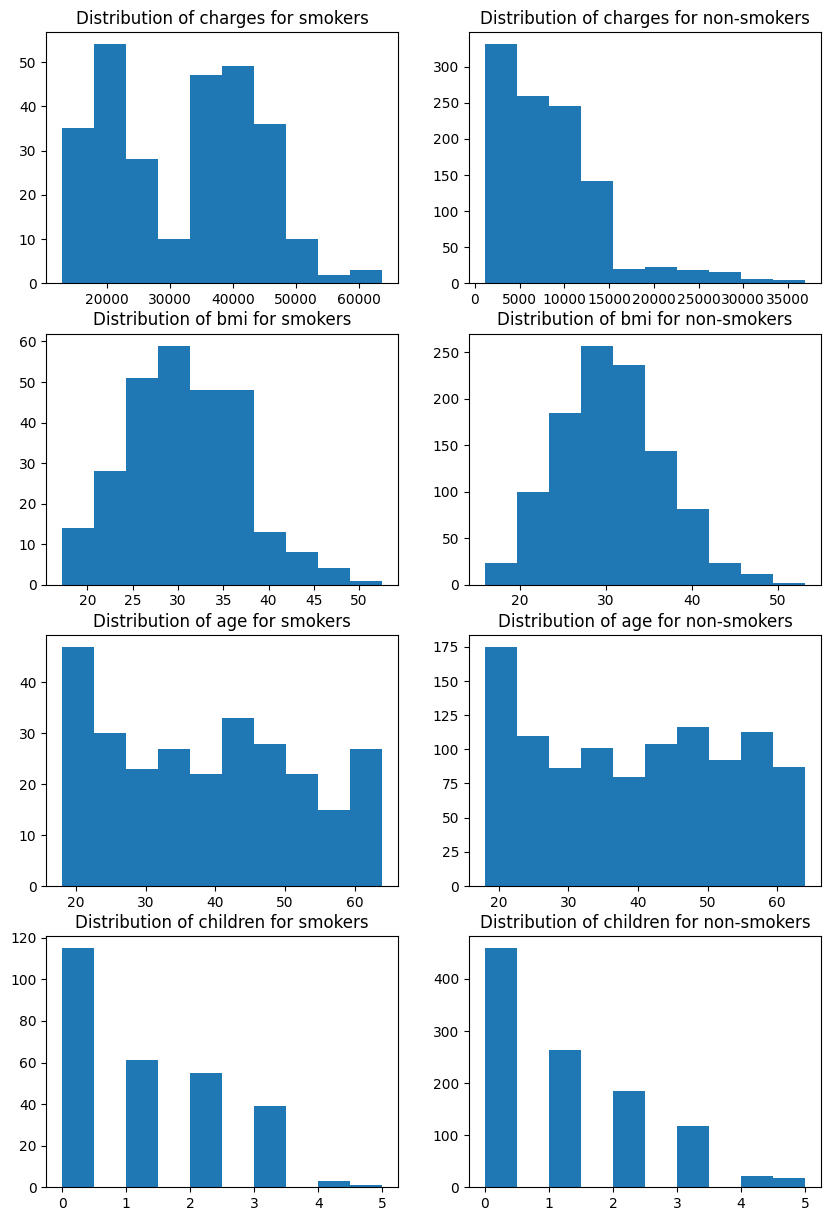

In [ ]:
numerical_features = ['charges', 'bmi', 'age', 'children']

subplot_number = 421
fig = plt.figure(figsize=(10,15))

for f in numerical_features:

  ax = fig.add_subplot(subplot_number)
  subplot_number += 1
  ax.hist(smokers[f])
  ax.set_title('Distribution of ' + f + ' for smokers')

  ax = fig.add_subplot(subplot_number)
  subplot_number += 1
  ax.hist(non_smokers[f])
  ax.set_title('Distribution of '+ f + ' for non-smokers')

**Question 4:** From the above histograms, deduce which feature tells us the most about a person being smoker or not?

charges

Now let's see if the gender influences being a smoker or not.

smoker   no  yes
sex             
female  547  115
male    517  159


<Axes: xlabel='sex'>

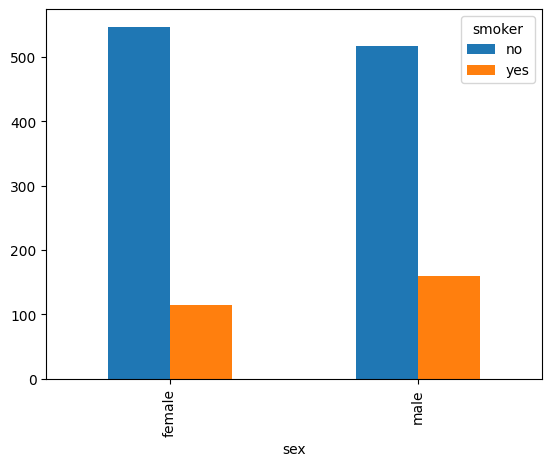

In [ ]:
Gender = pd.crosstab(data['sex'],data['smoker'])
print(Gender)
Gender.plot(kind='bar')

**Question 5:** What can you conclude about the gender and the smoker status?

the sex doesnt really effect wiether the person is smoker or not since the ratio between smokers and non smokers are too close for both genders

## 3. Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by removing missing data.

**Question 6:** How many missing value are there in each column?

In [ ]:
# print how many missing value in each column
data.isna().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

Let's drop rows with missing values

In [ ]:
# drop rows with missing values
df = data.dropna()

#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



**Question 7:**


*   Replace male and female with 0 and 1
*   Replace smoker and non smoker represented by yes and no in the dataframe with 0 and 1



In [ ]:
# define dictionary
encoding_dict = {
    'sex': {'male': 0, 'female': 1}
}

# replace sex column with 0/1
# df['sex'] = df['sex'].apply(lambda x: 1 if x == 'female' else 0)
# df.replace(('male', 'female'), (0, 1), inplace=True)
df.replace(encoding_dict, inplace=True)

# print head to verify
df.head()

<ipython-input-49-4b36379dc4bc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(encoding_dict, inplace=True)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


And now the smokers column

In [ ]:
# define dictionary
smokers = {'no':0, 'yes':1}

# replace smokers column with 0/1
df['smoker'] = df['smoker'].apply(lambda x: smokers[x])

# print head to verify
df.head()

<ipython-input-50-925a8fd238cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoker'] = df['smoker'].apply(lambda x: smokers[x])


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


And now the Region Column

In [ ]:
# define dictionary
regions = {'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}

# replace region column with the corresponding values
df['region'] = df['region'].apply(lambda x: regions[x])

# print head to verify
df.head()


<ipython-input-51-d8ce0004dfd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] = df['region'].apply(lambda x: regions[x])


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


#### Normalization

**Question 7:** Let's scale all the columns by dividing by the maximum

In [ ]:
# get the max of each column
df.max()


age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
region          3.00000
charges     63770.42801
dtype: float64

In [ ]:
# divide each column by its maximum value
df = df/df.max()


## 4. Model Training & Testing



#### Data splits

**Question 8:** Before training, we need to split data into training (80%) & testing (20%)

In [ ]:
features = ['age',	'sex',	'bmi',	'children', 'region',	'charges']
X = df[features]
y = df['smoker']

# split dataset in a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1068, 6) (1068,)
(267, 6) (267,)


#### Logistic Regression Modeling


In [ ]:
# define our regression model
model = LogisticRegression()
# train our model
model.fit(x_train, y_train)

LogisticRegression()

#### Evaluation

In [ ]:
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_model_1 = accuracy_score(y_pred, y_test)
precision_model1 = precision_score(y_test, y_pred)
recall_model1 = recall_score(y_test, y_pred)
f1_score_model1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_model_1,
      "\nPrecision:",precision_model1,
      "\nRecall:", recall_model1,
      "\nF1 Score:", f1_score_model1)

Accuracy: 0.9101123595505618 
Precision: 0.9459459459459459 
Recall: 0.6140350877192983 
F1 Score: 0.7446808510638299


We can see that the recall, and the f1 score can be improved.

**Question 9:** What can you do to improve results?

* collecting more data
* reshuffle by under or over sampling
* create more features


##5. Model Improvement

Now we will try to improve the model that we built.

####Handle data Imbalance

<Axes: >

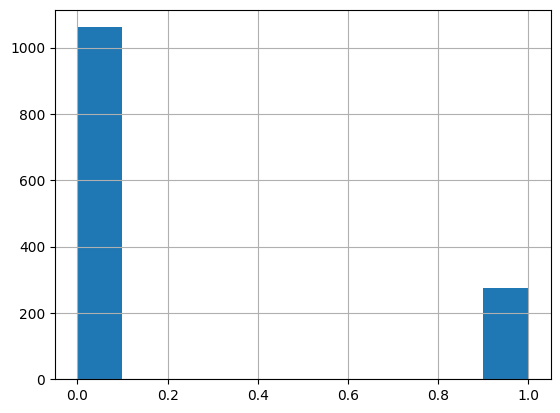

In [ ]:
df['smoker'].hist()

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy= 0.5)
x_new, y_new = over.fit_resample(X, y)
under = RandomUnderSampler(sampling_strategy= 1)
x_new, y_new = under.fit_resample(x_new, y_new)

(array([530.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 530.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

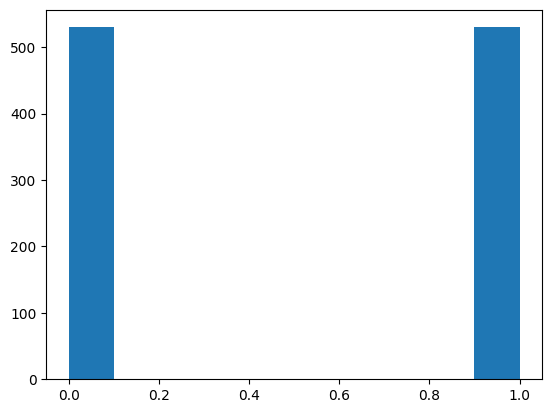

In [ ]:
plt.hist(y_new)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

accuracy_model2 = accuracy_score(y_test, y_pred)
precision_model2 = precision_score(y_test, y_pred)
recall_model2 = recall_score(y_test, y_pred)
f1_score_model2 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_model2,
      "\nPrecision:",precision_model2,
      "\nRecall:", recall_model2,
      "\nF1 Score:", f1_score_model2)

Accuracy: 0.9481132075471698 
Precision: 0.9 
Recall: 1.0 
F1 Score: 0.9473684210526316


In [ ]:
# Thank you miss Racha for all of your efforts, we'll miss those classes <3

We can see how much our scores got better when we balanced our dataset.